## Stata basics

### GUI and the do-file editor

Stata has an easy-to-use GUI for most operations. However, we recommend using Stata by writing your code in the do-file editor and then executing it. You can also use the commmand line but we advice that you use the command line only for tests.

The picture below shows the most important content of the Stata window. The toolbaar contains the buttons to open the do-file editor and the data editors. The Stata output will be printed in the results window.

![](figures/stata_window.png)

The do-file editor is basically just a text editor that can send code to Stata for execution. The execute button is located in the editor toolbar. You can run only selected parts of the code or the whole do file.

![](figures/stata_dofile_editor.png)

### Initializing the folder structure for the course

In this section I provide a command that you can run in the Stata command line or in separate do-file (such as init.do) that create a folder for the course materials.

```{warning}

You should not run shell commands without knowing what you are doing!

```

For Windows: 

```{Stata code}

shell mkdir %USERPROFILE%/ECON-C4100

```

For Unix (OS X or Linux):


```{Stata code}

shell mkdir ~/ECON-C4100

```

The commands command will tell Stata to tell your operating system to create a new directory (a folder) under your home/userprofile. You could also specify any other path other than your user profile as the location for the course materials folder. For instance, the folder I use is located on disk **Z**.

### Printing in Stata

The print command for Stata is the `display` or `di` command. Let's start by printing a familiar message:

In [1]:
di "Hello World!"

Hello World!


### Help

The most important Stata command is the `help` command. It searches the Stata documentation for the user input. Since this instance uses the `stata_kernel` for Jupyter Lab, we'll need to include `%` to the start of the command:

In [2]:
%help help

This front-end cannot display HTML help.

### Macros and scalars

Stata has two types of "variables" called local and global macros (not to be confused with actual Stata variables). Local macros are saved in memory until the end of the current do-file or Stata instance. Global macros are saved until you exit Stata.

Let’s start by saving your working directory with macros. Having created the folder `ECON-C4100` for the course materials we can save its path to a local and a global macro:

In [3]:
local userPath "Z:/ECON-C4100"
global userPath "Z:/ECON-C4100"

Macros are referenced with `` `localName' `` and ` $globalName `. We can print them by typing:

In [4]:
di "`userPath'"
di "$userPath"


Z:/ECON-C4100

Z:/ECON-C4100


One crucial thing about statistical programming is to know which folder your working directory is pointing at. Let's set our working dir to `$userPath`:

In [5]:
cd $userPath

Z:\ECON-C4100


You can print the location of the current working directory with two commands:

In [6]:
pwd
cd


Z:\ECON-C4100

Z:\ECON-C4100


To print the Stata system directories you can type:

In [7]:
sysdir

   STATA:  C:\Program Files (x86)\Stata15MP\
    BASE:  C:\Program Files (x86)\Stata15MP\ado\base\
    SITE:  C:\Program Files (x86)\Stata15MP\ado\site\
    PLUS:  c:\ado\plus\
PERSONAL:  c:\ado\personal\
OLDPLACE:  c:\ado\


You can combine macros easily:

In [8]:
local userPathTwice `userPath' $userPath
di "`userPathTwice'"



Z:/ECON-C4100 Z:/ECON-C4100


You can also erase macros by simply typing:

In [9]:
local userPathTwice

Macros can be used as counters:

In [10]:
local one_ 1
local two_ 2
local three_ `one_' + `two_'

In [11]:
di `three_'

3


However notice who `""` change the output:

In [12]:
di "`three_'"

1 + 2


You can also use scalars. They are refered with their names but can only store numbers:

In [13]:
scalar one_ = 1
scalar two_ = 2
scalar three_ = one_ + two_
di three_
scalar drop three_





3



### Commenting and line breaks in Stata

Including comments to your code is easy:

In [14]:
// Comment, one line
* Comment, one line

/* Comment, 
multiple 
lines */

The default chracter that marks the end of a command is newline (line break). You can change it to `;` and back easily:

In [15]:
#delimit ;
#delimit cr

When using the standard line break, we need to use `///` to tell Stata if our command is presented in multiple lines.

### Setting observations and generating variables

If we haven't imported any data to Stata, we can simulate some data. We can declare the number observations with se `set obs` command. Let's start with 100k observations:

In [31]:
clear all
set obs 100000



number of observations (_N) was 0, now 100,000


We can create new variables with the `generate` or `gen` command. It's first argument is the name of the new variable followed by the equal sign and the the value(s) that we like to assign to our variable. Let's consider three examples:

1. Drawing values from the standard normal distribution.
2. Generating a string variable
3. Generating a dummy variable.

In [32]:
gen v1 = rnormal() // draws observation values from the std. normal distribution
gen tail = "Left" // initialize tail value with "Left"
replace tail = "Right" if v1 > 0.5 // change right tail values
gen tail_dummy = v1 > 0.5 // 1 = if right tail, 0 otherwise




variable tail was str4 now str5
(30,927 real changes made)



Contains data
  obs:       100,000                          
 vars:             3                          
 size:     1,300,000                          
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
v1              float   %9.0g                 
tail            str5    %9s                   
tail_dummy      float   %9.0g                 
-------------------------

In [33]:
%browse 10

,v1,tail,tail_dummy
1,.44829085,Left,0
2,.69934845,Right,1
3,-.66045153,Left,0
4,-.72105825,Left,0
5,.45229378,Left,0
6,1.0015512,Right,1
7,-.35671255,Left,0
8,-.069343433,Left,0
9,.24252044,Left,0
10,.019378336,Left,0


Note: the `%browse` command only works in 

When declaring new variables, it's a good practice to start with some initialization value (such as the left tail of the distribution) and then `replace` the rest of the values with some `if` condition. Notice also that the dummy is generated directly with a boolean expression since `v1 > 0.5` returns either 1 or 0.

We conclude this exercise with a histogram of the simulated data:



(bin=50, start=-4.4683022, width=.17591609)


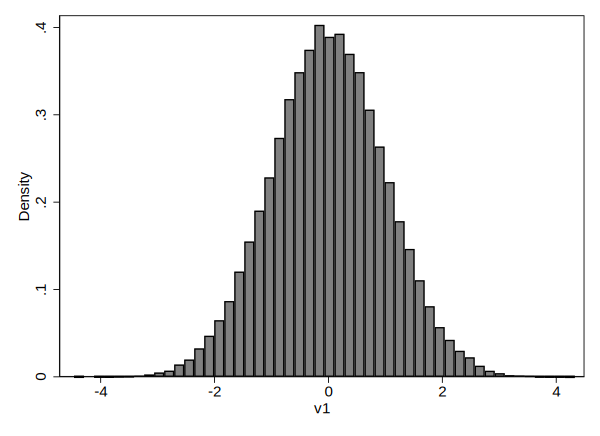

In [19]:
set scheme s1mono // just a style for our graph
hist v1

### Importing data to Stata in short: Example from Statistics Finland

Next I demonstrate on how to import text and Excel data to Stata. We obtain our data directly through Statistics Finland API (I’ve created the links beforehand). We could also download the data to disk and replace the address with the file path. More on that later... 

In [20]:
local delimiter "tab" // our data has 'tabulate' key as the delimiter.
import delimited using ///
https://pxnet2.stat.fi:443/PXWeb/sq/2c23b351-c9a5-4946-b9c1-06c8146e7119 , ///
delimiter(`delimiter') clear



(3 vars, 192 obs)


Let's describe our data in memory:

In [21]:
describe _all


              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
month           str7    %9s                   Month
commodity       str5    %9s                   Commodity
pointfigure     float   %9.0g                 Point figure


In Stata, the data is saved as variables. Think them as vectors or matrices or as columns.

Notice how the month variable has storage type `str7`. That means it’s a string variable. We can turn it into a time variable that Stata understands:

In [22]:
generate temp = monthly(month, "YM")
drop month
rename temp month
label variable month "Month"
format month %tm

Above, we first generate a new variable with the `generate` command. Then we delete the old variable with the `drop` command and rename the variable *temp* back to *month* with the `rename` command.

Finally, we give the new month variable it’s old label.

In [23]:
describe _all


              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
commodity       str5    %9s                   Commodity
pointfigure     float   %9.0g                 Point figure
month           float   %tm                   Month


We could also do the same with Excel data. This time Statistics Finland gives us a direct link to an Excel file:

In [24]:
import excel using ///
https://pxnet2.stat.fi/PXWeb/sq/feec4f38-7ddb-4c9f-b091-a0688c3f7b89 , ///
cellrange(A3:F194) firstrow clear

In [25]:
keep A B Pointfigure
rename A month
rename B commodity
generate temp = monthly(month, "YM")
drop month
rename temp month
label variable month "Month"
format month %tm

Excel files are often quite awkward. Notice how we need to determine the precise cellrange or the data would include some unwanted metadata from the Statistics Finland.

Command `keep` is the opposite of `drop`.

Finally, to demonstrate the dynamic options of Stata, let’s do a graph:

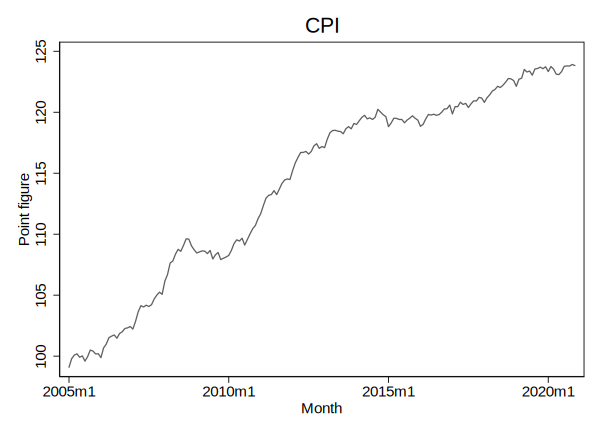

In [26]:
line Pointfigure month, title("CPI")